# Project 4) Churn prediction

## Part 1) Problem Statement

In this project, we will work on a fintech company dataset to identify users who are likely to cancel their subscription so that we can build new features that they may be interested in to increase engagement.

We have financial, demographic and product related data.

## Step 2) Importing the data

In [1]:
#importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [2]:
dataset = pd.read_csv('churn_data (project 4).csv')

In [3]:
dataset.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


### Exploring some of the fields

1) Housing:

* **na**: no information available about the housing information of the user
* **R**: user is renting the apartment/house
* **O**: user is the owner of the house/apartment.

2) credit score: credit score of the user

3) churn: whether the user has churned or not

4) purchases_partners: how many purchases a user has done outside of the partner stores

5) cc_taken: if the user has taken a credit card.

6) cc_recommended: whether or not the user was recommended a credit card.

7) cc_diskled: if the user has disliked a card (boolean)

8) cc_like: if the user has liked a card (boolean)

9) cc_application begin: how many times they started the application of the credit card

10) app_web_user: if the user has used both the app and web version (boolean)

11) waiting_4_loan: currently the user is waiting for a loan

12) left_for_two_months_plus: the user left for more than 2 months and then came back (1) else 0.

## Step 3) Data Preprocessing 

In [4]:
dataset.describe()

#Notes:
# 41% of the users have churned.
# The avg. age of the users is 32.

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


### Removing NaN

In [5]:
dataset.isna().sum()
#age, credit_score, rewards_score have null values.

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [6]:
#since there are 4 null values in age
dataset=dataset[pd.notnull(dataset.age)]

#dropping the 2 columns
dataset= dataset.drop(columns=['credit_score','rewards_earned'],axis=1)

### Feature Histograms

In [7]:
dataset2=dataset.drop(columns=['user','churn'])

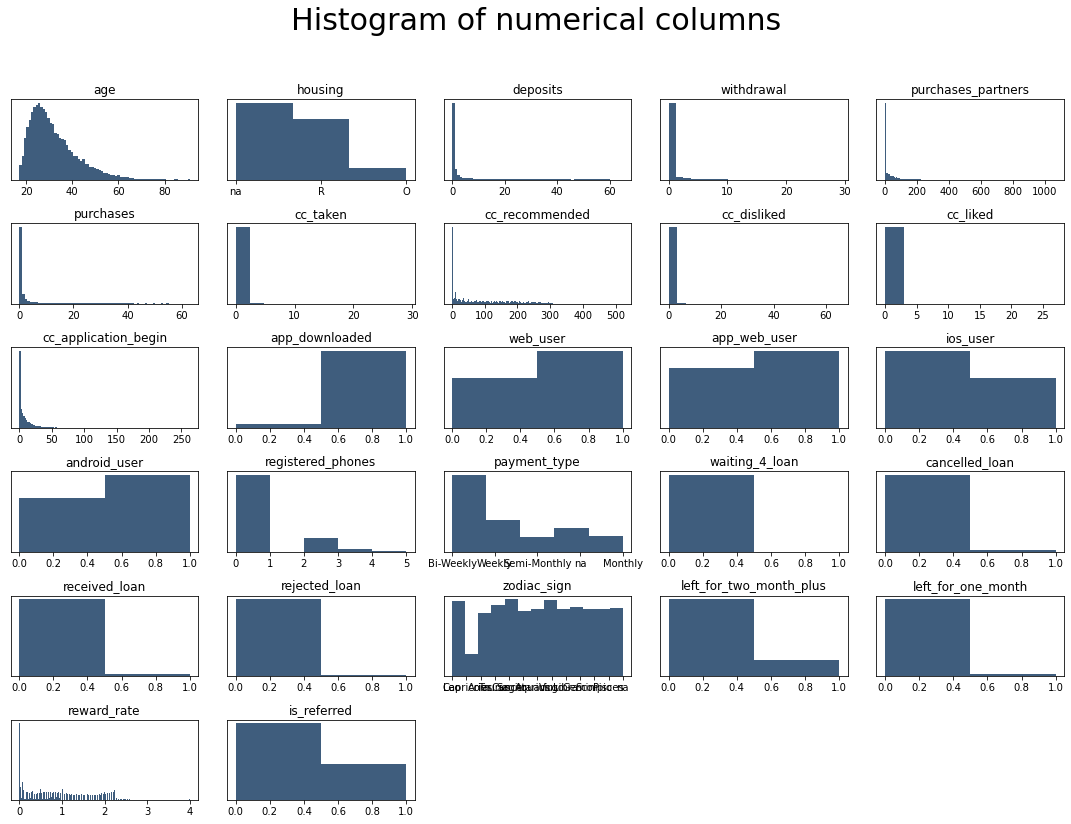

In [8]:
fig=plt.figure(figsize=(15,12))

#suptitle= super title
plt.suptitle('Histogram of numerical columns', size=30)

for i in range(1, dataset2.shape[1]+1):
    
    # 6 rows, 5 columms: 30 plots 
    plt.subplot(6,5,i)
    
    f=plt.gca()
    
    #remove y values to avoid overwhelming figures
    f.axes.get_yaxis().set_visible(False)
    
    f.set_title(dataset2.columns.values[i-1])
    
    #to create as many bins in the subplots as there are unique values
    vals=np.size(dataset2.iloc[:,i-1].unique())
    
    #plot the histogram
    plt.hist(dataset2.iloc[:,i-1], bins=vals, color='#3F5D7D')

    
#to avoid overlapping    
plt.tight_layout(rect=[0,0.03,1,0.95])

#### Notes from the histogram:

* Everyone seems to be above 18 yrs old. Age has a right skewed distribution.

* Majority of the users do not own a house.

* Majority of the people do not have any deposits. This may be because people do not trust the system initially.

* cc_application_begin has a right skewed distribution.

* Most common payment type is 'bi-weekly'.



Next, we will construct some Pie charts for better data visualization.

### Feature Pie Charts

In [9]:
dataset2 = dataset[['housing', 'is_referred', 'app_downloaded',
                    'web_user', 'app_web_user', 'ios_user',
                    'android_user', 'registered_phones', 'payment_type',
                    'waiting_4_loan', 'cancelled_loan',
                    'received_loan', 'rejected_loan', 'zodiac_sign',
                    'left_for_two_month_plus', 'left_for_one_month', 'is_referred']]

<ipython-input-10-7849833f1a7a>:22: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(values, labels=index, autopct='%1.1f%%')


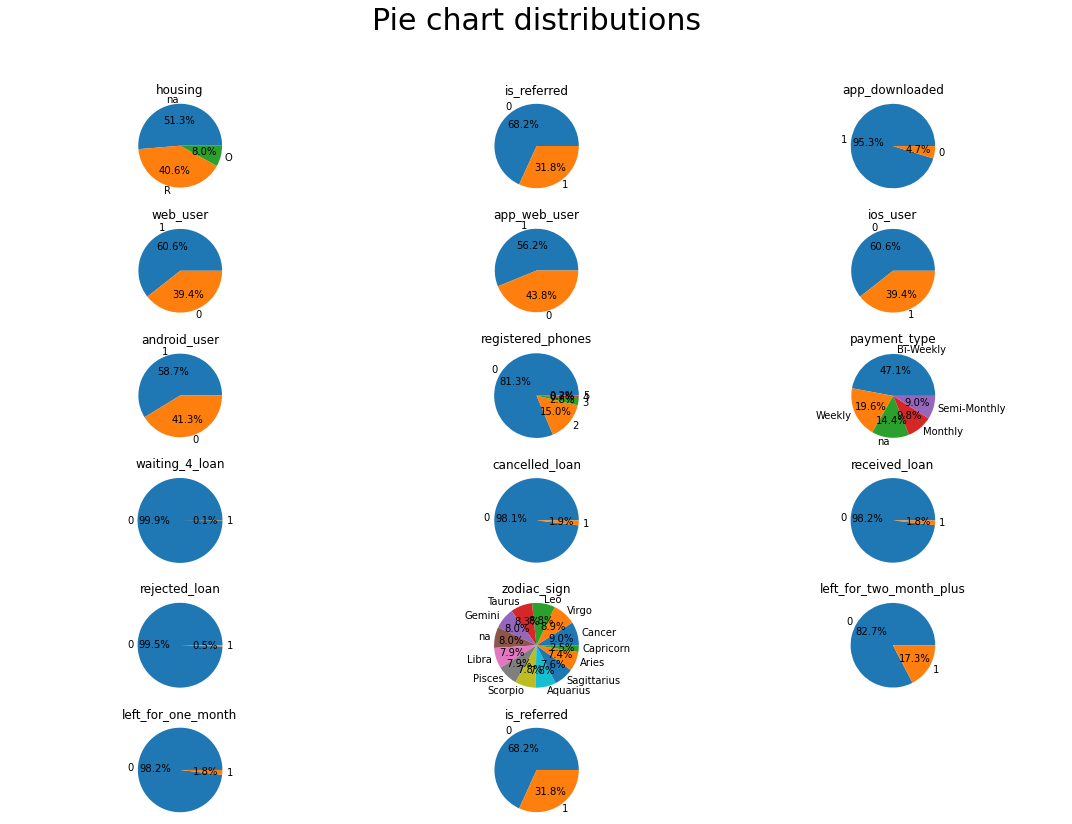

In [10]:
fig=plt.figure(figsize=(15,12))

#suptitle= super title
plt.suptitle('Pie chart distributions', size=30)

for i in range(1, dataset2.shape[1]+1):
    
    # 6 rows, 3 columms: 18 plots 
    plt.subplot(6,3,i)
    
    f=plt.gca()
    
    #remove y values to avoid overwhelming figures
    f.axes.get_yaxis().set_visible(False)
    
    f.set_title(dataset2.columns.values[i-1])
    
    values=dataset2.iloc[:,i-1].value_counts(normalize=True).values
    index=dataset2.iloc[:,i-1].value_counts(normalize=True).index
    
    #plot the histogram
    plt.pie(values, labels=index, autopct='%1.1f%%')
    plt.axis('equal')

    
#to avoid overlapping    
plt.tight_layout(rect=[0,0.03,1,0.95])

In [11]:
#exploring some fields in deatil to see if they can create a bias in the model
dataset[dataset2.waiting_4_loan==1].churn.value_counts()

0    27
1     8
Name: churn, dtype: int64

In [12]:
dataset[dataset2.cancelled_loan==1].churn.value_counts()

1    274
0    234
Name: churn, dtype: int64

In [13]:
dataset[dataset2.rejected_loan==1].churn.value_counts()

1    107
0     25
Name: churn, dtype: int64

In [14]:
dataset[dataset2.received_loan==1].churn.value_counts()

1    292
0    199
Name: churn, dtype: int64

In [15]:
dataset[dataset2.left_for_one_month==1].churn.value_counts()

1    266
0    222
Name: churn, dtype: int64

### Correlations

<AxesSubplot:title={'center':'Correlation with the response variable'}>

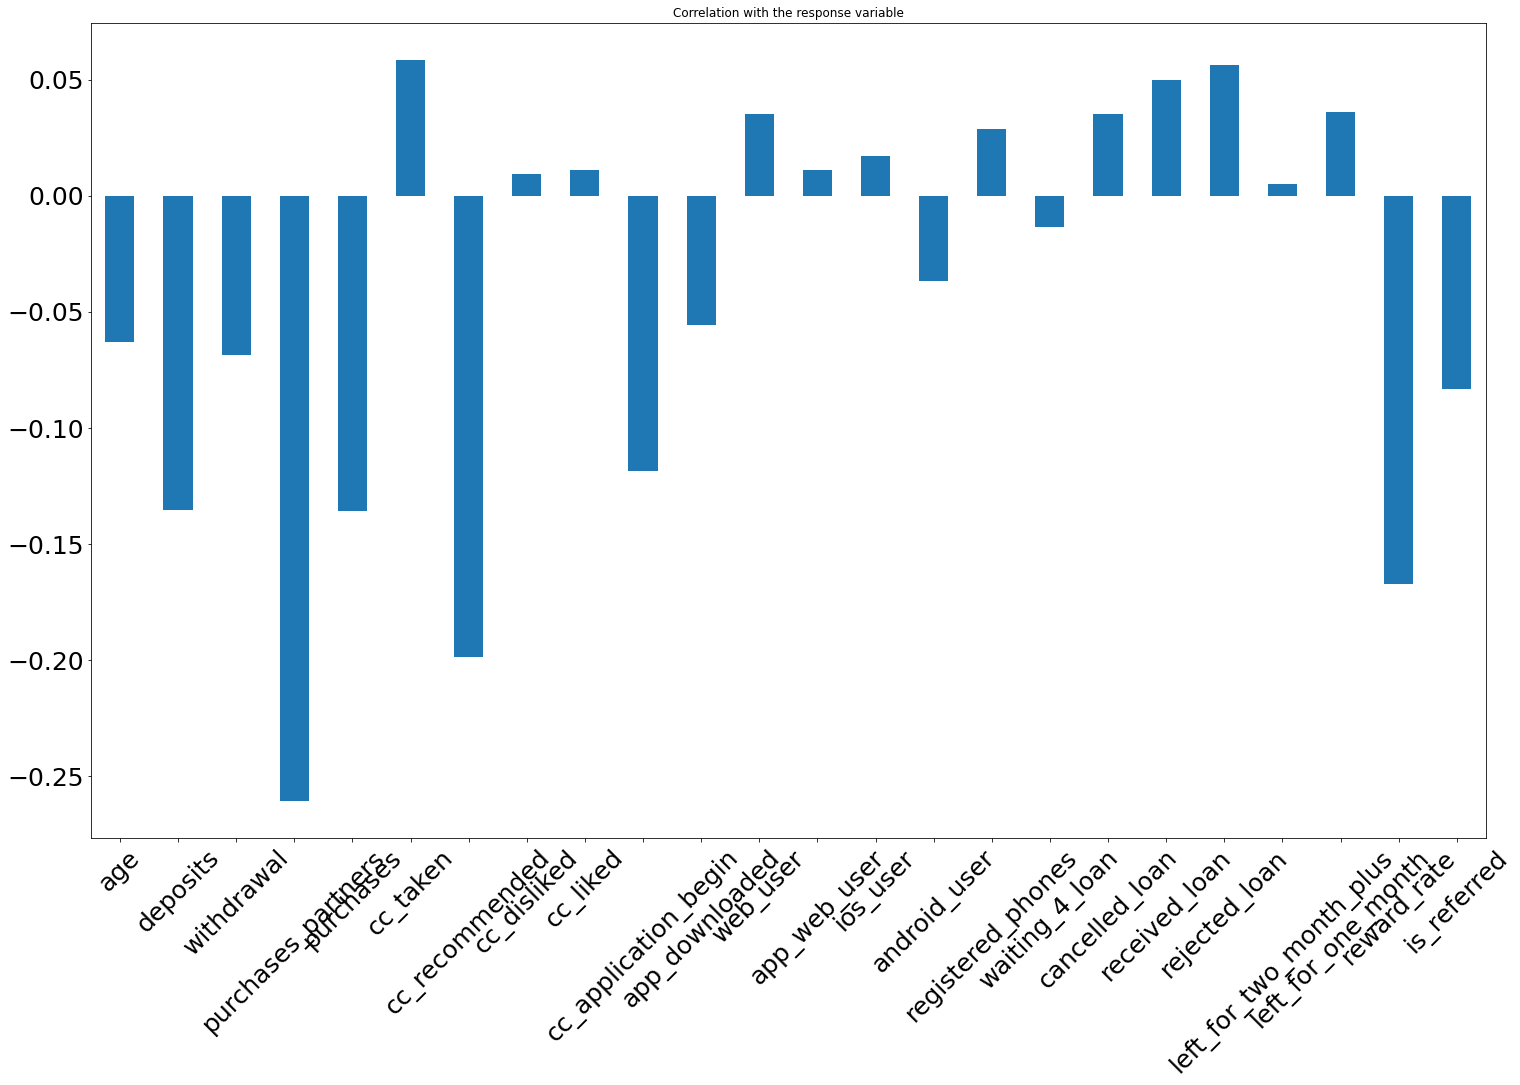

In [16]:
#this is necassary to identify those fields which can significantly impact the model

#exploring all the correlations witht the response variable

dataset.drop(columns=['churn', 'zodiac_sign','user','housing',
                     'payment_type']).corrwith(dataset.churn).plot.bar(
                                    figsize=(25,15),
                                    title='Correlation with the response variable',
                                    fontsize=25,
                                    rot=45)

#### Observations from the correlation plot:

* Age is negatively correlated to churn.

* Smaller the amount of deposit, higher is the chance of churn.

* More applications a user begins, lesser is the likelihood that the customer churns.

* Android users are more likely to stay compared to iOS users.

* If someone is referred by someone, the person is less likely to churn.



#### Correlation matrix

<AxesSubplot:>

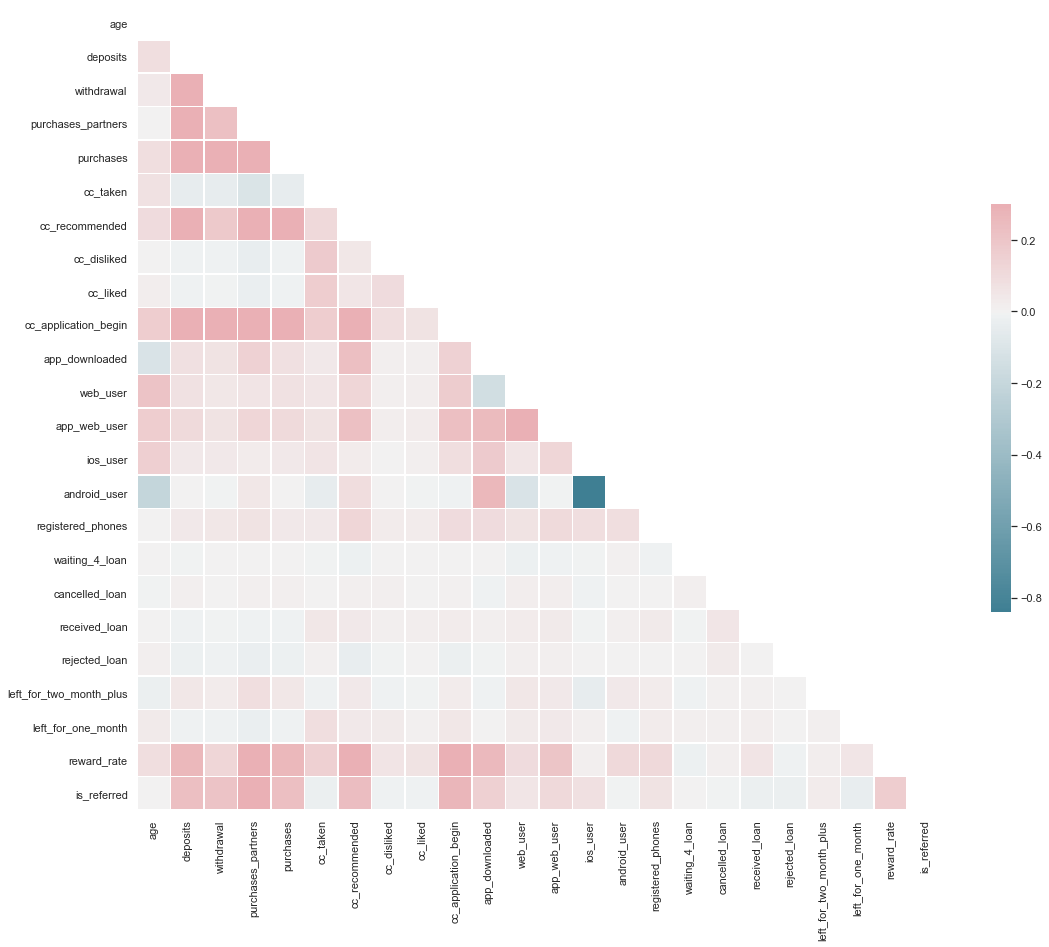

In [17]:
sn.set(style="white")

# Compute the correlation matrix
corr = dataset.drop(columns = ['user', 'churn']).corr()

# Generate a mask for the upper triangle
#since its a correlation matrix, we do not need other triangle to make it a complete square
# we can obtain all the info from the triangle.
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Observations:

* iOs and Android user have a strong negative correlation which is self explanatory. Hence, we can remove one of these columns before building the model.

* The strongest positive correlations is not greater than 0.3.

* cc_application_begin is quite strongly related to many fields. We may want to get rid of this field in the future.

* app_web_user is dependent on app_downloaded and web_user, which makes it a dependent variable. (This inference was not obtained from this correlation matrix).

In [18]:
dataset=dataset.drop(columns=['app_web_user'])

In [19]:
dataset.to_csv('new_churn_data.csv', index=False)

## Step 4) One hot encoding and Feature selection

In [20]:
dataset=pd.read_csv('new_churn_data.csv')

In [21]:
# data preperation

user_identifier=dataset.user
dataset=dataset.drop(columns=['user'])

In [22]:
# one hot encoding- to create categorical variables into their own binry columns

dataset.housing.value_counts()

na    13856
R     10969
O      2171
Name: housing, dtype: int64

In [23]:
dataset=pd.get_dummies(dataset)

In [24]:
#we need to avoid dummy variable trap which is caused by the strong correlation of the one hot encoded variables
#for every categorical variable, we can drop one of the columns
dataset=dataset.drop(columns=['housing_na',
                               'zodiac_sign_na',
                               'payment_type_na'])

In [25]:
#Splitting the data into training and testing.

from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test= train_test_split(dataset.drop(columns=['churn']),
                                                              dataset.churn,
                                                              test_size=0.2,
                                                              random_state=0)

In [26]:
y_train.value_counts()

0    12656
1     8940
Name: churn, dtype: int64

In [27]:
#balancing the training set since accuracy can be a little deceiving.
#we perform undersampling in this project
#it reduces bias while addding some variance in the model since the dataset has less records in total now.

pos_index=y_train[y_train.values==1].index
neg_index=y_train[y_train.values==0].index

if len(pos_index)> len(neg_index):
    higher=pos_index
    lower=neg_index
else:
    higher=neg_index
    lower=pos_index

import random
random.seed(0) #to duplicate records later

#we are going to subset 'higher' into the size of 'lower'
#chopping higher so that the size of higher and lower are same
#the end result is a numpy array
higher = np.random.choice(higher, size=len(lower))

#hence, we convert this to an array as well
lower = np.asarray(lower)

new_indexes = np.concatenate((lower, higher))

X_train = X_train.loc[new_indexes,]
y_train = y_train[new_indexes] 

In [28]:
#normalising the data

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

#converting into a dataframe since StandardScaler returns a numpy array.
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))

#standard scaler removes the index and columns
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

X_train = X_train2
X_test = X_test2

## Step 5) Model Building & Model Validation

In [29]:
# Fitting Model to the Training Set

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)

#### Evaluating results

In [30]:

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print('The accuracy is %0.4f' %accuracy_score(y_test, y_pred))
print('the precision is %0.4f' %precision_score(y_test, y_pred)) 
print('The recall is %0.4f'%recall_score(y_test, y_pred) )
print('The F1 score is %0.4f' %f1_score(y_test, y_pred))


The accuracy is 0.6085
the precision is 0.5188
The recall is 0.7431
The F1 score is 0.6110


<AxesSubplot:>

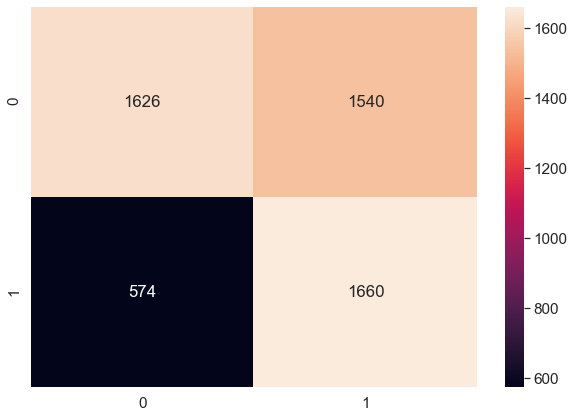

In [31]:
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')


In [32]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Logistic Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

Logistic Accuracy: 0.647 (+/- 0.021)


In [33]:
# Analyzing Coefficients
# this is done to identify which variables are essential in predicting the response variable.
#we will use this coeff for feature selection later and subsequently run the whole process on a new model.

pd.concat([pd.DataFrame(X_train.columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

,features,coef
0,age,-0.156966
1,deposits,0.098139
2,withdrawal,0.024817
3,purchases_partners,-0.748173
4,purchases,-0.236853
5,cc_taken,0.091376
6,cc_recommended,0.057285
7,cc_disliked,-0.035402
8,cc_liked,-0.015716
9,cc_application_begin,0.039387


#### Feature selection

In [35]:

#reduce the number of columns while giving same accuracy- faster models
#RFE- recursive Feature Elimination

from sklearn.feature_selection import RFE

classifier=LogisticRegression()

In [37]:
rfe= RFE(classifier,20)
rfe=rfe.fit(X_train, y_train)

/Users/shashanktiwari/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [38]:
#returns a boolean of all the variables determined essential by RFE
print(rfe.support_)

[ True  True False  True  True  True  True False False  True False  True
  True False  True False  True  True  True  True  True  True  True  True
 False False False False  True  True False False False False False False
 False False False False False]


In [39]:
#the top 20 columns
X_train.columns[rfe.support_]

Index(['age', 'deposits', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_application_begin', 'web_user', 'ios_user',
       'registered_phones', 'cancelled_loan', 'received_loan', 'rejected_loan',
       'left_for_two_month_plus', 'left_for_one_month', 'reward_rate',
       'is_referred', 'housing_O', 'payment_type_Weekly',
       'zodiac_sign_Aquarius'],
      dtype='object')

In [41]:
#the top 20 columns have a rank of 1,the 21st most important column has a rank of 2, 22nd has a rank of 3..
rfe.ranking_

array([ 1,  1,  6,  1,  1,  1,  1,  2, 13,  1, 15,  1,  1, 14,  1,  5,  1,
        1,  1,  1,  1,  1,  1,  1, 10, 11, 12, 19,  1,  1, 22, 16, 21,  7,
        8,  3, 20, 17,  4,  9, 18])

The accuracy is 0.6113
the precision is 0.5210
The recall is 0.7498
The F1 score is 0.6148


<AxesSubplot:>

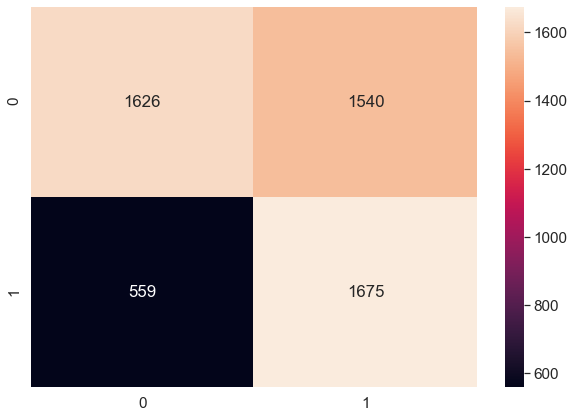

In [44]:
#repeating the entire model building process with the 20 most important fields

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test[X_test.columns[rfe.support_]])

#evaluating results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print('The accuracy is %0.4f' %accuracy_score(y_test, y_pred))
print('the precision is %0.4f' %precision_score(y_test, y_pred)) 
print('The recall is %0.4f'%recall_score(y_test, y_pred) )
print('The F1 score is %0.4f' %f1_score(y_test, y_pred))

#plotting the confusion matrix
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')



In [45]:
#Analyzing coefficients for the new model


pd.concat([pd.DataFrame(X_train.columns[rfe.support_], columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

,features,coef
0,age,-0.157845
1,deposits,0.104300
2,purchases_partners,-0.739556
3,purchases,-0.227886
4,cc_taken,0.083029
5,cc_recommended,0.057750
6,cc_application_begin,0.038703
7,web_user,0.146869
8,ios_user,0.066109
9,registered_phones,0.080626


## Step 6) Final results & Conclusion

In [48]:
final_results=pd.concat([y_test,user_identifier],axis=1).dropna()
final_results['predicted_churn']=y_pred
final_results=final_results[['user','churn','predicted_churn']].reset_index(drop=True)
final_results.head()

,user,churn,predicted_churn
0,61353,1.0,1
1,67679,0.0,0
2,21269,0.0,0
3,69531,0.0,1
4,25997,0.0,0


#### Final remarks

* The model obtained a 61% accuracy.

* We do not have information about when the user will churn, making the model difficult to validate.

* We identified fields which impacted churn a long time after a user signed up. Adding a time limit would have made identifying these features difficult.

* If adding more features resulted in less churn, we can validate those features to be customer engaging.

* Scope of improvement: adding a time dimension in the response variable. For instance, 'Who will leave in 1 week?'

